<a href="https://colab.research.google.com/github/Sidd-2906/NLP/blob/main/Email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [21]:
programme = """Artificial beings with intelligence appeared as storytelling devices in antiquity,[17] and have been common in fiction, as in Mary Shelley's Frankenstein or Karel Čapek's R.U.R.[18] These characters and their fates raised many of the same issues now discussed in the ethics of artificial intelligence.[19]

            The study of mechanical or "formal" reasoning began with philosophers and mathematicians in antiquity. The study of mathematical logic led directly to Alan Turing's theory of computation, which suggested that a machine, by shuffling symbols as simple as "0" and "1", could simulate any conceivable act of mathematical deduction. This insight that digital computers can simulate any process of formal reasoning is known as the Church–Turing thesis.[20] This, along with concurrent discoveries in neurobiology, information theory and cybernetics, led researchers to consider the possibility of building an electronic brain.[21] The first work that is now generally recognized as AI was McCullouch and Pitts' 1943 formal design for Turing-complete "artificial neurons".[22]

            By the 1950s, two visions for how to achieve machine intelligence emerged. One vision, known as Symbolic AI or GOFAI, was to use computers to create a symbolic representation of the world and systems that could reason about the world. Proponents included Allen Newell, Herbert A. Simon, and Marvin Minsky. Closely associated with this approach was the "heuristic search" approach, which likened intelligence to a problem of exploring a space of possibilities for answers.

            The second vision, known as the connectionist approach, sought to achieve intelligence through learning. Proponents of this approach, most prominently Frank Rosenblatt, sought to connect Perceptron in ways inspired by connections of neurons.[23] James Manyika and others have compared the two approaches to the mind (Symbolic AI) and the brain (connectionist). Manyika argues that symbolic approaches dominated the push for artificial intelligence in this period, due in part to its connection to intellectual traditions of Descartes, Boole, Gottlob Frege, Bertrand Russell, and others. Connectionist approaches based on cybernetics or artificial neural networks were pushed to the background but have gained new prominence in recent decades.[24]

            The field of AI research was born at a workshop at Dartmouth College in 1956.[d][27] The attendees became the founders and leaders of AI research.[e] They and their students produced programs that the press described as "astonishing":[f] computers were learning checkers strategies, solving word problems in algebra, proving logical theorems and speaking English.[g][29]"""


In [22]:
import re
#from nltk.corpus import stopwords
from nltk.corpus import stopwords

In [34]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
wordnet = WordNetLemmatizer()

In [35]:
sentences = nltk.sent_tokenize(programme)


In [36]:
corpus = []
for i in range(len(sentences)):
  review = re.sub('[^a-zA-Z]'," ",sentences[i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
  review = ' '.join(review)
  corpus.append(review)


In [37]:
stopwords("english")

TypeError: ignored

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=100)
X = cv.fit_transform(corpus).toarray()

In [39]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.38295602, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.25953512, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [40]:
X.shape

(20, 100)

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
df = pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")


In [46]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
list(df.columns)

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [47]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3577,ham,They said Ì_ dun haf passport or smth like dat...,NaN,NaN,NaN


In [52]:
new_df = df[['v1', 'v2']]

In [53]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
new_df = new_df.replace({'v1': {'ham': 1, 
                                'spam': 0}})

In [57]:
new_df

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...


In [63]:
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
warnet = WordNetLemmatizer()

In [64]:
corpus = []
for i in range(len(new_df)):
  review = re.sub("[^a-zA-Z]"," ",new_df['v2'][i])
  review = review.lower()
  review = review.split()
  review = [warnet.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
  #review = [warnet.lemmatize(word) for word in review if  not word in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [65]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features= 5000)
X = cv.fit_transform(corpus).toarray()

In [74]:
X.shape

(5572, 5000)

In [75]:
Y = new_df['v1']

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

In [78]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((4457, 5000), (4457,), (1115, 5000), (1115,))

**Machine Learning approach**

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
y_pred = rf.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9829596412556054

In [80]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,Y_train)
y_pred = xgb.predict(X_test)
accuracy_score(Y_test,y_pred)

0.9757847533632287

In [81]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(Y_test,y_pred)

In [82]:
confusion_m

array([[115,  22],
       [  5, 973]])

**Deep Learning**

In [87]:
import tensorflow as tf

from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import  LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

In [89]:
voc_size = 6000
onehot_rep = [one_hot(word,voc_size) for word in corpus]
onehot_rep

[[144,
  5686,
  1605,
  3020,
  538,
  3931,
  1726,
  4412,
  174,
  1812,
  711,
  4642,
  3537,
  2193,
  1999,
  4527],
 [519, 469, 4068, 2671, 3283, 1281],
 [4902,
  2016,
  2384,
  3834,
  3317,
  1783,
  4876,
  4162,
  5509,
  4533,
  3158,
  4448,
  1783,
  5844,
  2016,
  1638,
  5110,
  2011,
  2547,
  5665,
  5755],
 [3283, 4443, 3585, 4187, 4872, 3283, 5665, 5359, 3585],
 [1383, 2962, 144, 1281, 5657, 4, 1370],
 [2602,
  5654,
  4394,
  4298,
  1818,
  4469,
  5014,
  939,
  1476,
  2119,
  519,
  1831,
  5110,
  2189,
  2018,
  2532],
 [4181, 2140, 5014, 5500, 1489, 5014, 4103, 1568],
 [615,
  14,
  1306,
  1306,
  3169,
  1461,
  1867,
  263,
  609,
  2180,
  2618,
  5414,
  213,
  4920,
  2180],
 [2699,
  5222,
  5289,
  4342,
  2032,
  5935,
  2571,
  4362,
  5488,
  2665,
  5488,
  1999,
  5902,
  76,
  1953],
 [4945,
  1203,
  3283,
  4198,
  2049,
  249,
  1447,
  3135,
  4945,
  2305,
  4902,
  2665,
  4945,
  249,
  5325,
  4902],
 [3582, 626, 5021, 3490, 1255, 5

In [90]:
sent_length = 30
embedded_sequence = pad_sequences(onehot_rep,padding = 'pre',maxlen= sent_length)
print(embedded_sequence)

[[   0    0    0 ... 2193 1999 4527]
 [   0    0    0 ... 2671 3283 1281]
 [   0    0    0 ... 2547 5665 5755]
 ...
 [   0    0    0 ... 5378 5760 2444]
 [   0    0    0 ...  987 3283 4902]
 [   0    0    0 ...  505 2854  957]]


In [91]:
len(embedded_sequence)

5572

In [92]:
embedding_vector_feature = 50
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_feature,input_length = sent_length))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = "Adam",metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 50)            300000    
                                                                 
 batch_normalization (BatchN  (None, 30, 50)           200       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm (LSTM)                 (None, 100)               60400     
                                                                 
 batch_normalization_1 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 100)               0

In [93]:
len(embedded_sequence),Y.shape

(5572, (5572,))

In [95]:
x_final = np.array(embedded_sequence)
y_final = np.array(Y)

In [96]:
x_final.shape,y_final.shape

((5572, 30), (5572,))

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x_final,y_final,test_size = 0.2,random_state = 42)

In [98]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((4457, 30), (4457,), (1115, 30), (1115,))

In [99]:
history = model.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 10,batch_size = 64)

Epoch 1/10
70/70 [==============================] - 11s 78ms/step - loss: 0.4008 - accuracy: 0.8279 - val_loss: 0.3940 - val_accuracy: 0.8655
Epoch 2/10
70/70 [==============================] - 4s 64ms/step - loss: 0.0777 - accuracy: 0.9829 - val_loss: 0.3749 - val_accuracy: 0.8655
Epoch 3/10
70/70 [==============================] - 6s 82ms/step - loss: 0.0523 - accuracy: 0.9872 - val_loss: 0.3566 - val_accuracy: 0.8655
Epoch 4/10
70/70 [==============================] - 5s 68ms/step - loss: 0.0281 - accuracy: 0.9937 - val_loss: 0.4114 - val_accuracy: 0.8700
Epoch 5/10
70/70 [==============================] - 6s 80ms/step - loss: 0.0163 - accuracy: 0.9969 - val_loss: 0.3555 - val_accuracy: 0.8951
Epoch 6/10
70/70 [==============================] - 5s 70ms/step - loss: 0.0129 - accuracy: 0.9973 - val_loss: 0.1592 - val_accuracy: 0.9552
Epoch 7/10
70/70 [==============================] - 5s 65ms/step - loss: 0.0087 - accuracy: 0.9987 - val_loss: 0.1247 - val_accuracy: 0.9722
Epoch 8/10
7

In [100]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

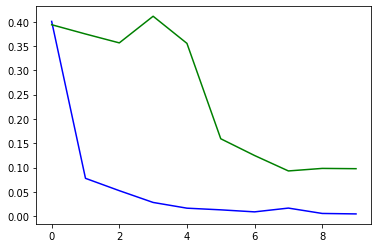

In [112]:
plt.plot(history.history['loss'], "-b",label = 'loss')
plt.plot(history.history['val_loss'],"-g",label = 'val_loss')

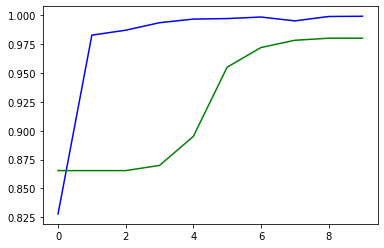

In [111]:
plt.plot(history.history['accuracy'],'-b',label = 'accuracy');
plt.plot(history.history['val_accuracy'],'-g',label = 'val_accuracy');